Importing libraries

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Data Loading and Exploration

In [7]:
data=pd.read_csv('AAPL, 1D 01012007-12072023.csv')

In [46]:
data.head()

,volume,vwap,opening price,closing price,highest price,lowest price,time,transactions,day_difference,year,month,quarter
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,-0.0892,2007,January,1
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,0.0575,2007,January,1
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,-0.0257,2007,January,1
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,-0.0175,2007,January,1
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,0.2186,2007,January,1


In [47]:
data.isnull().sum()

volume            0
vwap              0
opening price     0
closing price     0
highest price     0
lowest price      0
time              0
transactions      0
day_difference    0
year              0
month             0
quarter           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [11]:
# we should convert data column for easier exploration
data['time']=pd.to_datetime(data['time'],unit='s')

In [12]:
data.duplicated().sum()
# checking for duplicate rows

0

In [13]:
len(data['volume'].unique())
# checking for unique values in volume column

4159

In [14]:
data = data.rename(columns={'open': 'opening price', 'close': 'closing price', 'high': 'highest price', 'low': 'lowest price'})

# 2. Data Visualization and Statistical Analysis

In [15]:
data['day_difference']=data['closing price']-data['opening price']

In [16]:
top_ten_max_day_difference = data.nlargest(10, 'day_difference')
top_ten_min_day_difference = data.nsmallest(10, 'day_difference')
avg_day_difference = data['day_difference'].mean()
print(f"Average day difference: {avg_day_difference}")
print("Top 10 days with the highest day difference:\n")
for index, row in top_ten_max_day_difference.iterrows():
    print(f"Date: {row['time']}, Opening Price: {row['opening price']}, Closing Price: {row['closing price']}, Day Difference: {row['day_difference']}")
print("Top 10 days with the lowest day difference:\n")
for index, row in top_ten_min_day_difference.iterrows():
    print(f"Date: {row['time']}, Opening Price: {row['opening price']}, Closing Price: {row['closing price']}, Day Difference: {row['day_difference']}")

Average day difference: 0.033269992786727494
Top 10 days with the highest day difference:

Date: 2022-02-24 05:00:00, Opening Price: 152.58, Closing Price: 162.74, Day Difference: 10.159999999999997
Date: 2022-10-13 04:00:00, Opening Price: 134.99, Closing Price: 142.99, Day Difference: 8.0
Date: 2022-10-28 04:00:00, Opening Price: 148.2, Closing Price: 155.74, Day Difference: 7.5400000000000205
Date: 2022-11-30 05:00:00, Opening Price: 141.395, Closing Price: 148.03, Day Difference: 6.634999999999991
Date: 2023-02-03 05:00:00, Opening Price: 148.03, Closing Price: 154.5, Day Difference: 6.469999999999999
Date: 2022-05-26 04:00:00, Opening Price: 137.39, Closing Price: 143.78, Day Difference: 6.390000000000015
Date: 2022-05-04 04:00:00, Opening Price: 159.67, Closing Price: 166.02, Day Difference: 6.350000000000023
Date: 2022-11-10 05:00:00, Opening Price: 141.24, Closing Price: 146.87, Day Difference: 5.6299999999999955
Date: 2020-09-21 04:00:00, Opening Price: 104.54, Closing Price: 

Based on previous results we can research and see what could affect stock data those days

For example (data from Chat GPT):
1.  On February 24, 2022, Apple Inc. made an announcement related to its annual shareholder meeting. This event included discussions on Apple's financial performance, strategic initiatives, and various proposals from shareholders. It provided a platform for shareholders to engage with the company's leadership and vote on important corporate governance matters.
2.  On December 16, 2021
  * Apple announced its expansion in Southern California to develop in-house wireless chips, aiming to reduce its dependence on third-party suppliers like Broadcom and Qualcomm. This expansion included hiring engineers to work on various wireless technologies in Irvine, California​ (AppleInsider)​.
  * Additionally, Apple highlighted its ongoing efforts to address California's housing crisis by deploying $1 billion to support affordable housing projects across the state. This initiative has funded the construction of thousands of affordable housing units and provided financial assistance to first-time homebuyers and vulnerable populations​ (Apple)​.


In [17]:
#grouping our data for better presentation by month
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month_name()
data['quarter'] = data['time'].dt.quarter
month_data = data.groupby(['year', 'month']).agg({
    'day_difference': 'mean',
    'closing price': 'mean',
    'time': 'first'  # This will keep the first date for each month
}).reset_index()

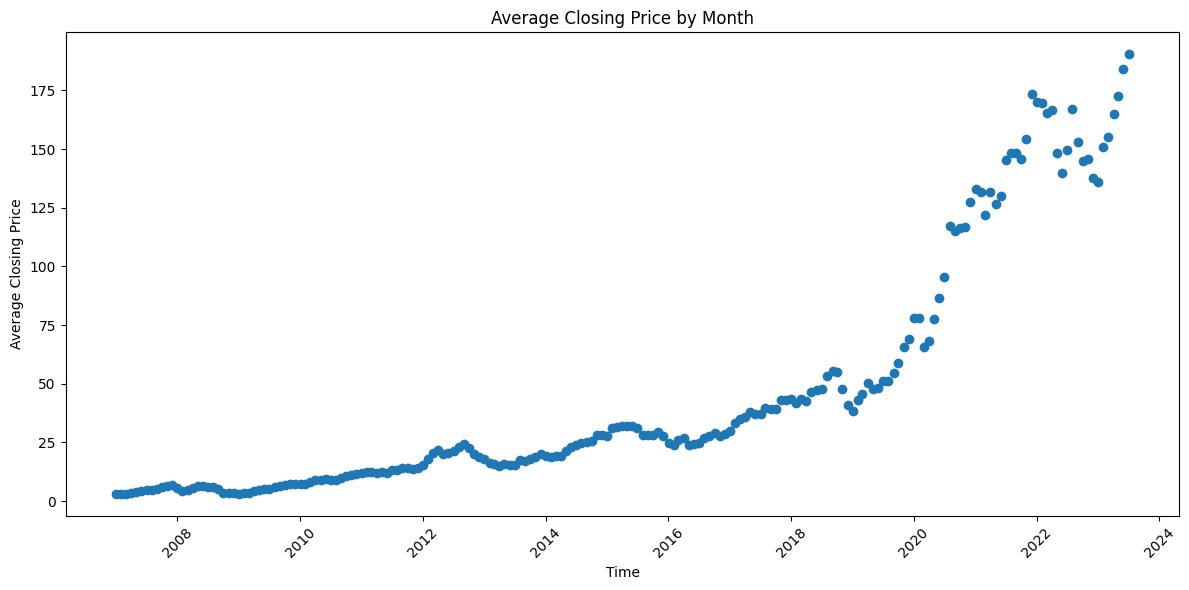

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(month_data['time'], month_data['closing price'])
plt.xlabel('Time')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
#grouping our data for better presentation by quarter
quarter_data = data.groupby(['year', 'quarter']).agg({
    'day_difference': 'mean',
    'closing price': 'mean',
    'time': 'first',
    'volume': 'mean'
}).reset_index()

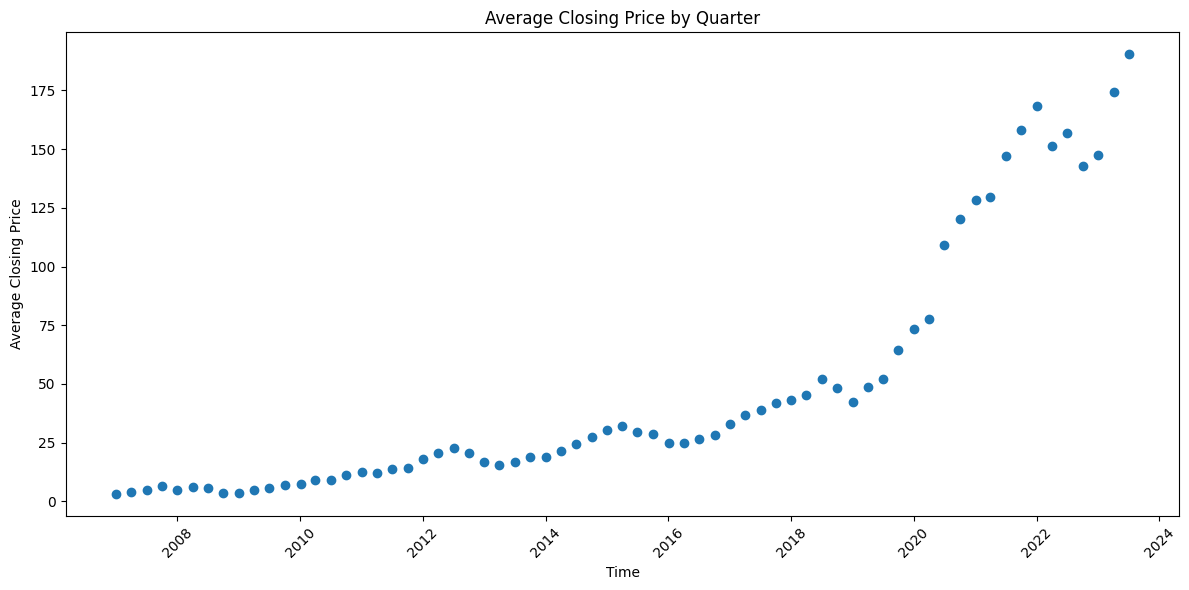

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(quarter_data['time'], quarter_data['closing price'])
plt.xlabel('Time')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price by Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see on this graph Apple stock price have tandency to growth. Significant raise appear after 2020, and eventhough it had falling time in 2022, it is still continue  to grow.

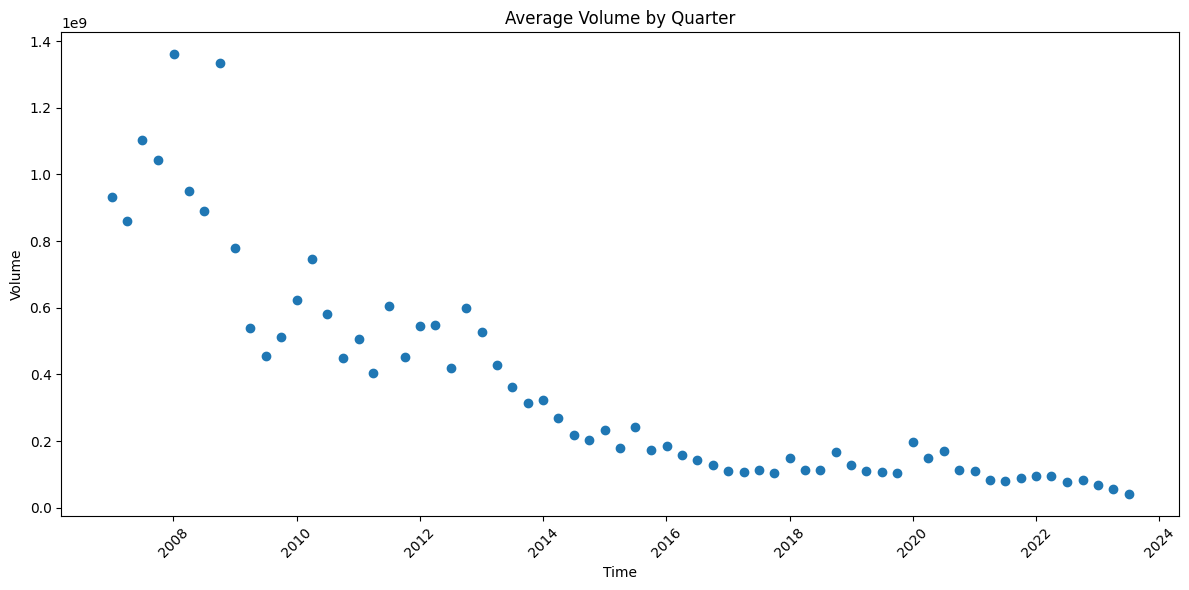

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(quarter_data['time'], quarter_data['volume'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Average Volume by Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Volume of sails keep falling

In [41]:
# by applying different filters here, you can change time periods for following code
candle_data=data[data['time']>=np.datetime64('2023-05-01')].reset_index(drop=True)

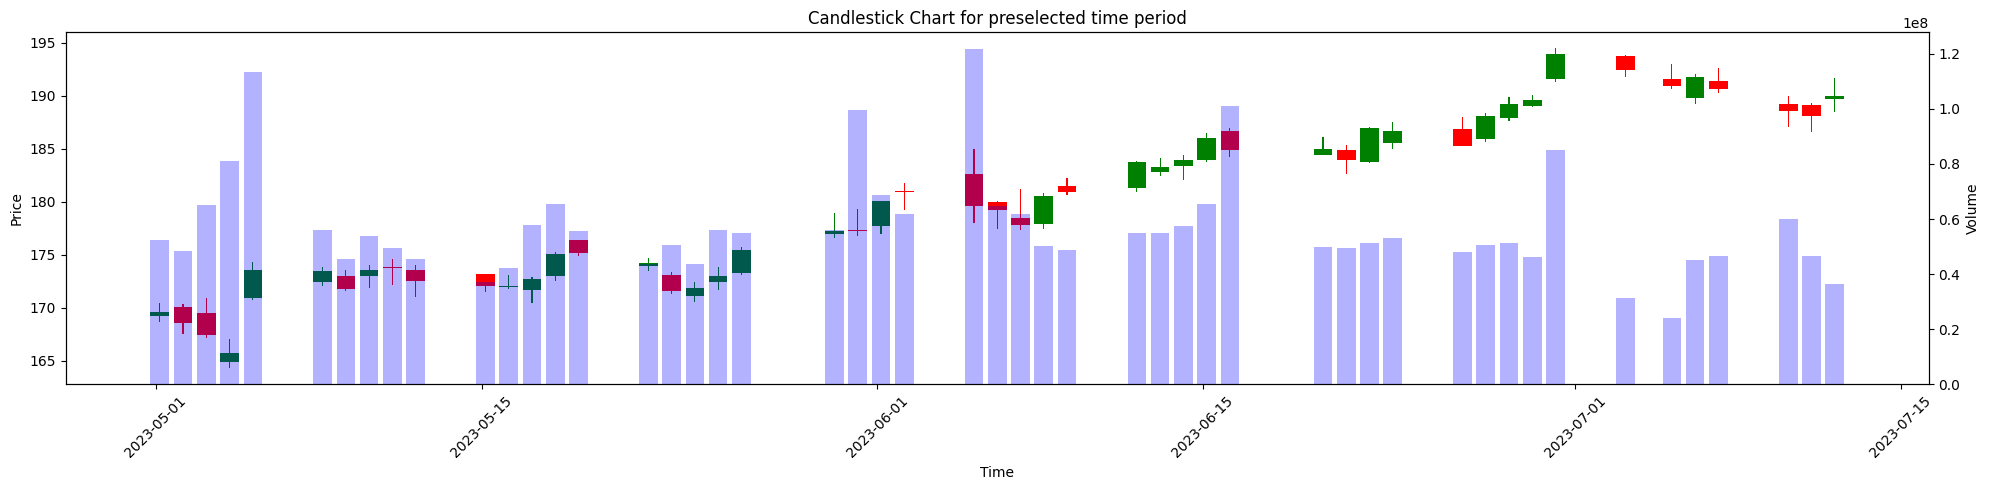

In [45]:
# Candlestick Chart
fig, ax1 = plt.subplots(figsize=(20, 5))
up_color = 'green'
down_color = 'red'
up_candles = candle_data[candle_data['day_difference'] > 0]
down_candles = candle_data[candle_data['day_difference'] < 0]
width1 = .8
width2 = .05
# Create the candlestick chart
ax1.bar(up_candles['time'], up_candles['day_difference'], width1,bottom=up_candles['opening price'],color=up_color)
ax1.bar(up_candles['time'], up_candles['highest price']-up_candles['closing price'], width2,bottom=up_candles['closing price'], color=up_color)
ax1.bar(up_candles['time'], up_candles['lowest price']-up_candles['opening price'], width2,bottom=up_candles['opening price'], color=up_color)
ax1.bar(down_candles['time'], down_candles['day_difference'], width1,bottom=down_candles['opening price'], color=down_color)
ax1.bar(down_candles['time'], down_candles['highest price'] - down_candles['opening price'] , width2,bottom=down_candles['opening price'], color=down_color)
ax1.bar(down_candles['time'], down_candles['lowest price'] - down_candles['closing price'],width2, bottom=down_candles['closing price'], color=down_color)
ax1.set_title('Candlestick Chart for preselected time period')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
ax2.set_ylabel('Volume')
ax2.bar(candle_data['time'], candle_data['volume'], width1 , alpha=0.3, color='blue')
plt.tight_layout()
plt.show()



In [48]:
# Summaary statistics for key columns
summary_stats = data[['volume', 'vwap', 'opening price', 'closing price', 'highest price', 'lowest price', 'transactions', 'day_difference']].describe()
print(summary_stats)


             volume         vwap  opening price  closing price  highest price  \
count  4.159000e+03  4159.000000    4159.000000    4159.000000    4159.000000   
mean   3.662925e+08    46.391382      46.362788      46.396058      46.881127   
std    3.724793e+08    50.277557      50.235593      50.293482      50.843874   
min    2.422234e+07     2.841000       2.835400       2.792900       2.928600   
25%    1.067497e+08    11.936200      11.955700      11.947150      12.028400   
50%    2.136463e+08    25.885200      25.775000      25.825000      26.262800   
75%    4.965321e+08    52.154150      52.263750      52.231250      52.626250   
max    3.373042e+09   193.102000     193.780000     193.970000     194.480000   

       lowest price  transactions  day_difference  
count   4159.000000  4.159000e+03     4159.000000  
mean      45.865790  2.709318e+05        0.033270  
std       49.680104  2.510859e+05        1.058161  
min        2.792900  3.048700e+04       -7.080000  
25%       

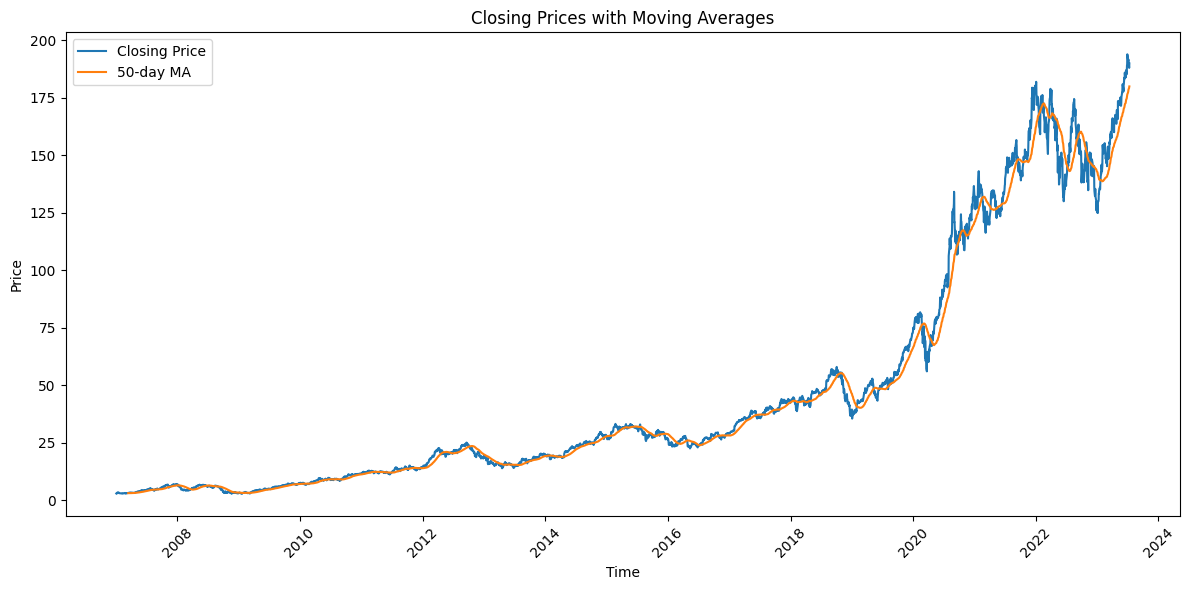

In [50]:
#Analyzys of closing prices with a moving average.
data['MA50'] = data['closing price'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['closing price'], label='Closing Price')
plt.plot(data['time'], data['MA50'], label='50-day MA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Closing Prices with Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Hypothesis Testing

In [55]:
# t-test
year_1=2020
year_2=2021
avg_close_year_1=data[data['year']==year_1]['closing price']
avg_close_year_2=data[data['year']==year_2]['closing price']

statistic, p_value = stats.ttest_ind(avg_close_year_1, avg_close_year_2)
print(f"t-statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

alpha=0.05

if p_value < alpha:
  print(f"There is a statistically significant difference in average closing price between {year_1} and {year_2} (p-value  < {alpha}).")
else:
  print(f"There is no statistically significant difference in average closing price between {year_1} and {year_2} (p-value = {p_value:.4f}).")

t-statistic: -27.5888
p-value: 0.0000
There is a statistically significant difference in average closing price between 2020 and 2021 (p-value  < 0.05).


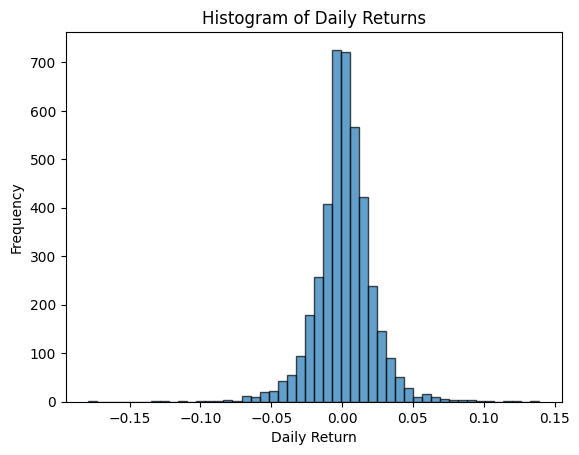

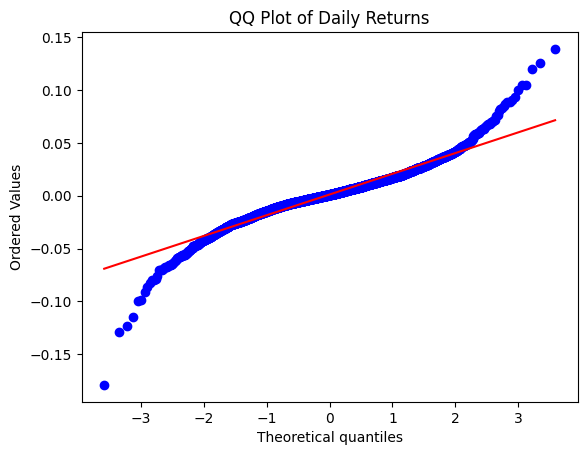

Shapiro-Wilk Test Statistic: 0.9406672716140747
Shapiro-Wilk Test P-Value: 6.185059009108278e-38
Kolmogorov-Smirnov Test Statistic: 0.07291083815189281
Kolmogorov-Smirnov Test P-Value: 1.1454495082272407e-19
Shapiro-Wilk test: The daily returns are not normally distributed.
Kolmogorov-Smirnov test: The daily returns are not normally distributed.


In [58]:
# Calculate daily returns
data['Daily Return'] = data['closing price'].pct_change().dropna()

# Plot the distribution of daily returns
plt.hist(data['Daily Return'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
stats.probplot(data['Daily Return'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of Daily Returns')
plt.show()

# Test for normality using Shapiro-Wilk test
shapiro_stat, shapiro_p_value = stats.shapiro(data['Daily Return'].dropna())
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"Shapiro-Wilk Test P-Value: {shapiro_p_value}")

# Test for normality using Kolmogorov-Smirnov test
ks_stat, ks_p_value = stats.kstest(data['Daily Return'].dropna(), 'norm', args=(data['Daily Return'].mean(), data['Daily Return'].std()))
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"Kolmogorov-Smirnov Test P-Value: {ks_p_value}")

if shapiro_p_value < 0.05:
    print("Shapiro-Wilk test: The daily returns are not normally distributed.")
else:
    print("Shapiro-Wilk test: The daily returns are normally distributed.")

if ks_p_value < 0.05:
    print("Kolmogorov-Smirnov test: The daily returns are not normally distributed.")
else:
    print("Kolmogorov-Smirnov test: The daily returns are normally distributed.")


In [59]:
correlation_matrix = data[['transactions', 'highest price']].corr()
print(correlation_matrix)

               transactions  highest price
transactions       1.000000       0.777224
highest price      0.777224       1.000000
